In [31]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [32]:
data= pd.read_csv('/home/gsmodi/Music/OneDrive_1_29-02-2020/Datasets/q5/Train.csv')

In [33]:
x=data.iloc[:,1].values
y=data.iloc[:,2].values

In [34]:
print(x)

['The sight of the military restored hope to those who fled, and revenge took place of fear.'
 'Just as the building was wiped out by a German shell, there had been a success.'
 'Do you wonder how it will seem?' ...
 'He had a narrow head, bulging, watery blue eyes that seemed never to wink, a flat nose, a receding forehead and chin, and singularly undeveloped ears.'
 'There does not exist the man in England with adequate presumption.'
 '"Every man," he said, "dreams about something, love, honour, and pleasure; you dream of friendship, and devote yourself to a maniac; well, if that be your vocation, doubtless you are in the right to follow it."']


In [35]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit(x)
xt = X.transform(x)
x1=xt.toarray()
classifier = LinearSVC(dual=False, random_state = 0)
classifier.fit(xt,y)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
          verbose=0)

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=500)
data_without_label_vectorise=pca.fit_transform(x1)

In [37]:
 data_without_label_vectorise.shape

(15663, 500)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(data_without_label_vectorise, y, test_size=0.2)

In [44]:
def liner(c):
    classifier = LinearSVC(dual=False, random_state = 0)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    report=classification_report(y_test, y_pred)
    print(report)
    print ("Accuracy:- " ,accuracy_score(y_test,y_pred))
    print ("F-1 Score:- " ,f1_score(y_test,y_pred,average=None))

In [49]:
def linear_diff_para(p,l,c,d):
    classifier = LinearSVC(penalty=p,loss=l,C=c,dual=d)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    report=classification_report(y_test, y_pred)
    print(report)
    print ("Accuracy:- " ,accuracy_score(y_test,y_pred))
    print ("F-1 Score:- " ,f1_score(y_test,y_pred,average=None))

In [40]:
def svm_different_kernel(k,c):
  clf = svm.SVC(probability=False ,kernel=k,C=c,gamma = 'auto')
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(accuracy_score(y_test, y_pred))

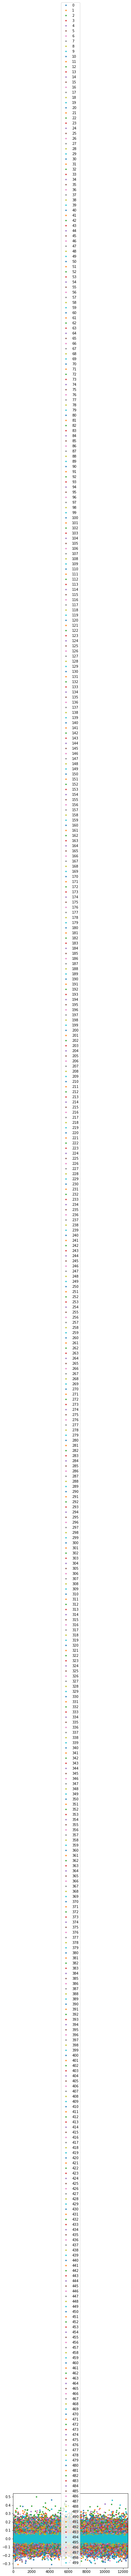

In [21]:
dataframe = pd.DataFrame(x_train)
dataframe.head()
dataframe.plot(style='.')

In [45]:
c=[0.1,10,1]

for c1 in c:
    print("   C = ",c)
    liner(c1)
    
    
    

   C =  [0.1, 10, 1]
              precision    recall  f1-score   support

         EAP       0.77      0.79      0.78      1297
         HPL       0.73      0.75      0.74       862
         MWS       0.79      0.75      0.77       974

    accuracy                           0.77      3133
   macro avg       0.76      0.76      0.76      3133
weighted avg       0.77      0.77      0.77      3133

Accuracy:-  0.7654005745292052
   C =  [0.1, 10, 1]
              precision    recall  f1-score   support

         EAP       0.77      0.79      0.78      1297
         HPL       0.73      0.75      0.74       862
         MWS       0.79      0.75      0.77       974

    accuracy                           0.77      3133
   macro avg       0.76      0.76      0.76      3133
weighted avg       0.77      0.77      0.77      3133

Accuracy:-  0.7654005745292052
   C =  [0.1, 10, 1]
              precision    recall  f1-score   support

         EAP       0.77      0.79      0.78      1297
    

## 8.Implementing SVM using different Kernel

In [46]:
diff_kernel=['linear','poly','rbf']
for k in diff_kernel:
    svm_different_kernel(k,1)

0.7574210022342802
0.41398021066070856
0.41398021066070856


In [52]:
para = [['l2','hinge',1.0,True],['l1','squared_hinge',0.1,False],['l2','squared_hinge',0.1,True]]
for p1 in para:
    linear_diff_para(p1[0],p1[1],p1[2],p1[3])

/home/gsmodi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


              precision    recall  f1-score   support

         EAP       0.76      0.79      0.77      1297
         HPL       0.73      0.74      0.74       862
         MWS       0.78      0.73      0.76       974

    accuracy                           0.76      3133
   macro avg       0.76      0.75      0.76      3133
weighted avg       0.76      0.76      0.76      3133

Accuracy:-  0.7577401851260772
F-1 Score:-  [0.77271014 0.73526012 0.75730218]
              precision    recall  f1-score   support

         EAP       0.72      0.78      0.75      1297
         HPL       0.70      0.70      0.70       862
         MWS       0.76      0.68      0.72       974

    accuracy                           0.73      3133
   macro avg       0.73      0.72      0.72      3133
weighted avg       0.73      0.73      0.72      3133

Accuracy:-  0.7251835301627833
F-1 Score:-  [0.74602588 0.7004662  0.71761518]
              precision    recall  f1-score   support

         EAP       0.74  